<a href="https://colab.research.google.com/github/ugeshe/Reliable_Airline_to_Bay_Area/blob/main/Dallas_SanJose_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[Dataset](https://transtats.bts.gov/OT_Delay/OT_DelayCause1.asp) Select the data from June 2003 to April 2025

In [7]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/Job_Search/On_Time_Airlines_Dallas_San_Jose/ot_delaycause1_DL/Airline_Delay_Cause.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,4,G4,Allegiant Air,SCK,"Stockton, CA: Stockton Metro",32.0,6.0,0.73,0.59,...,0.00,2.72,0.0,0.0,169.0,46.0,10.0,50.0,0.0,63.0
1,2025,4,G4,Allegiant Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",50.0,20.0,2.90,0.36,...,1.00,10.21,0.0,0.0,1382.0,93.0,8.0,454.0,193.0,634.0
2,2025,4,G4,Allegiant Air,SFB,"Sanford, FL: Orlando Sanford International",885.0,285.0,54.15,13.07,...,0.21,171.47,1.0,0.0,20506.0,5460.0,1297.0,1980.0,8.0,11761.0
3,2025,4,G4,Allegiant Air,SGF,"Springfield, MO: Springfield-Branson National",67.0,11.0,2.58,0.46,...,0.00,5.86,0.0,3.0,718.0,217.0,43.0,122.0,0.0,336.0
4,2025,4,G4,Allegiant Air,SHV,"Shreveport, LA: Shreveport Regional",8.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
sjc_df = df[df['airport'] == 'SJC']
display(sjc_df.head())

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
85,2025,4,HA,Hawaiian Airlines Network,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",60.0,18.0,15.32,0.00,...,0.0,2.68,0.0,0.0,735.0,610.0,0.0,0.0,0.0,125.0
275,2025,4,NK,Spirit Airlines,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",125.0,15.0,4.49,0.00,...,0.0,0.56,0.0,0.0,854.0,287.0,0.0,551.0,0.0,16.0
585,2025,4,OO,SkyWest Airlines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",723.0,79.0,39.35,4.91,...,0.0,21.81,1.0,0.0,3640.0,1579.0,270.0,847.0,0.0,944.0
726,2025,4,QX,Horizon Air,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",125.0,12.0,5.02,0.00,...,0.0,6.66,3.0,0.0,743.0,492.0,0.0,15.0,0.0,236.0
1019,2025,4,AA,American Airlines Network,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",120.0,28.0,8.60,1.91,...,0.0,13.41,4.0,0.0,2326.0,992.0,272.0,171.0,0.0,891.0


In [10]:
sjc_df_filtered = sjc_df[['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'carrier_ct', 'carrier_delay']]
display(sjc_df_filtered.head())

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,carrier_ct,carrier_delay
85,2025,4,HA,Hawaiian Airlines Network,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",60.0,15.32,610.0
275,2025,4,NK,Spirit Airlines,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",125.0,4.49,287.0
585,2025,4,OO,SkyWest Airlines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",723.0,39.35,1579.0
726,2025,4,QX,Horizon Air,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",125.0,5.02,492.0
1019,2025,4,AA,American Airlines Network,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",120.0,8.60,992.0


In [11]:
unique_carriers = sjc_df_filtered['carrier_name'].unique()
print("List of all airline carriers at SJC:")
for carrier in unique_carriers:
    print(carrier)

List of all airline carriers at SJC:
Hawaiian Airlines Network
Spirit Airlines
SkyWest Airlines Inc.
Horizon Air
American Airlines Network
Alaska Airlines Network
Delta Air Lines Network
Frontier Airlines
United Air Lines Network
Southwest Airlines
Envoy Air
JetBlue Airways
Mesa Airlines Inc.
Compass Airlines
GoJet Airlines LLC d/b/a United Express
American Airlines Inc.
Alaska Airlines Inc.
United Air Lines Inc.
Southwest Airlines Co.
Delta Air Lines Inc.
Frontier Airlines Inc.
Hawaiian Airlines Inc.
US Airways Inc.
Virgin America
American Eagle Airlines Inc.
Continental Air Lines Inc.
Northwest Airlines Inc.
ExpressJet Airlines Inc.
Atlantic Southeast Airlines
America West Airlines Inc.
Independence Air
ATA Airlines d/b/a ATA


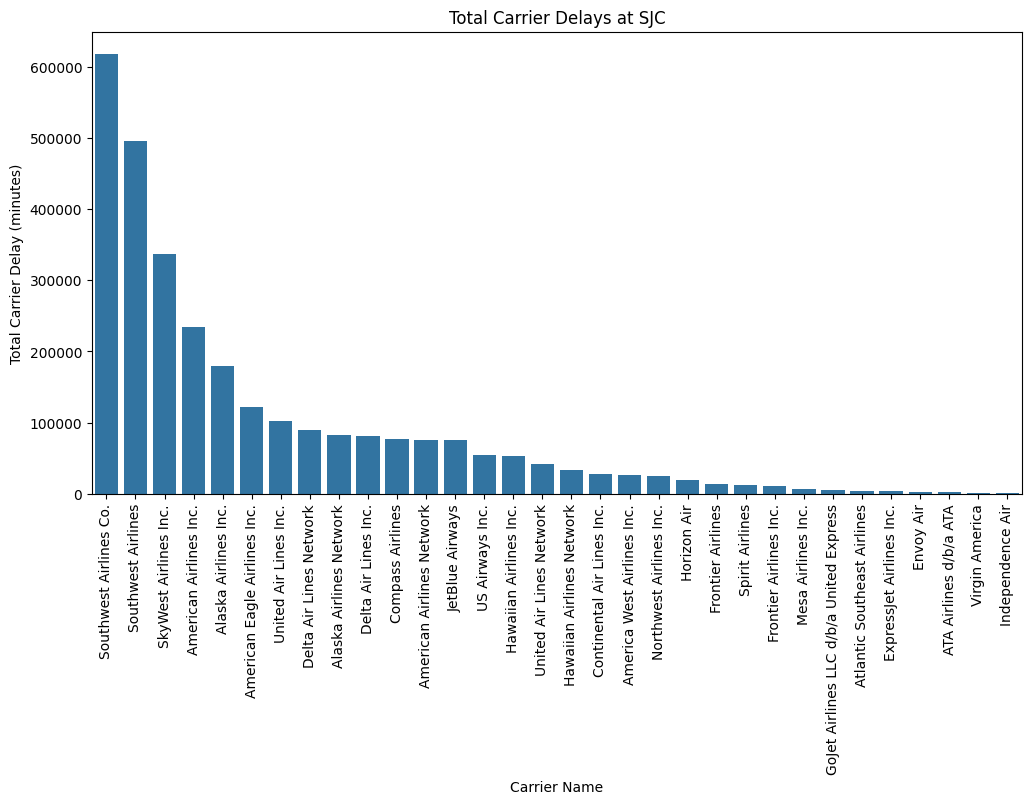

In [ ]:
carrier_delays = sjc_df_filtered.groupby('carrier_name')['carrier_delay'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=carrier_delays.index, y=carrier_delays.values)
plt.xticks(rotation=90)
plt.xlabel('Carrier Name')
plt.ylabel('Total Carrier Delay (minutes)')
plt.title('Total Carrier Delays at SJC')
plt.show()

In [ ]:
import plotly.express as px

fig = px.bar(carrier_delays, x=carrier_delays.index, y=carrier_delays.values,
             labels={'x':'Carrier Name', 'y':'Total Carrier Delay (minutes)'},
             title='Total Carrier Delays at SJC (Interactive)')
fig.show()

# Task
Using the data in "airline_delay_causes_SJC.csv", create two interactive line charts to visualize airline delays at SJC airport.

1.  **Yearly Delays per Airline:** Create a line chart showing the total `carrier_delay` for each `carrier_name` for each `year`.
2.  **Overall Delay Trend:** Create a line chart showing the total `carrier_delay` across all airlines for each `year`.

The charts should be clear and easy for a general audience to understand, with a focus on the visual trends rather than precise y-axis values.

## Yearly delays per airline

### Subtask:
Create a line chart showing the total carrier delay for each airline for each year. This will help visualize how each airline's delay performance has changed over time.


**Reasoning**:
To create the line chart, I will first group the data by 'year' and 'carrier_name' and calculate the sum of 'carrier_delay' for each group. Then, I will use `plotly.express` to create an interactive line chart to visualize the yearly carrier delays, with each airline represented by a different colored line.



In [ ]:
yearly_carrier_delays = sjc_df_filtered.groupby(['year', 'carrier_name'])['carrier_delay'].sum().reset_index()

fig = px.line(yearly_carrier_delays, x='year', y='carrier_delay', color='carrier_name',
              labels={'year': 'Year', 'carrier_delay': 'Total Carrier Delay (minutes)', 'carrier_name': 'Airline'},
              title='Yearly Carrier Delays at SJC by Airline')
fig.show()

## Overall delay trend

### Subtask:
Create a line chart showing the total carrier delay across all airlines for each year. This will give a high-level overview of the delay trend at SJC over the entire period of the dataset.


**Reasoning**:
To visualize the overall delay trend, I will first group the `sjc_df_filtered` dataframe by 'year' and calculate the sum of 'carrier_delay'. Then, I will use `plotly.express` to create an interactive line chart with 'year' on the x-axis and the total 'carrier_delay' on the y-axis, adding appropriate labels and a title.



In [ ]:
yearly_delays = sjc_df_filtered.groupby('year')['carrier_delay'].sum().reset_index()

fig = px.line(yearly_delays, x='year', y='carrier_delay',
              labels={'year': 'Year', 'carrier_delay': 'Total Carrier Delay (minutes)'},
              title='Overall Yearly Carrier Delays at SJC')
fig.show()

## Summary:

### Data Analysis Key Findings
- **Data Aggregation:** The data was aggregated to calculate the total carrier delay per airline for each year, as well as the overall total carrier delay across all airlines for each year.
- **Data Visualization:** Two interactive line charts were created to visualize the delay trends.
    - The first chart, "Yearly Carrier Delays at SJC by Airline," displays individual delay trends for each airline over the years.
    - The second chart, "Overall Yearly Carrier Delays at SJC," shows the aggregated delay trend for all airlines combined.

### Insights or Next Steps
- **Further Analysis:** Investigate the specific reasons for significant spikes or drops in delays for particular airlines or years. This could involve analyzing other delay categories (`weather_delay`, `nas_delay`, etc.) or external factors.


In [ ]:
fewest_delays = carrier_delays.tail(10)
print("Airlines with the fewest delays at SJC:")
print(fewest_delays)

Airlines with the fewest delays at SJC:
carrier_name
Spirit Airlines                            12396.0
Frontier Airlines Inc.                     11071.0
Mesa Airlines Inc.                          6060.0
GoJet Airlines LLC d/b/a United Express     5687.0
Atlantic Southeast Airlines                 4194.0
ExpressJet Airlines Inc.                    3586.0
Envoy Air                                   2594.0
ATA Airlines d/b/a ATA                      1857.0
Virgin America                              1366.0
Independence Air                             713.0
Name: carrier_delay, dtype: float64


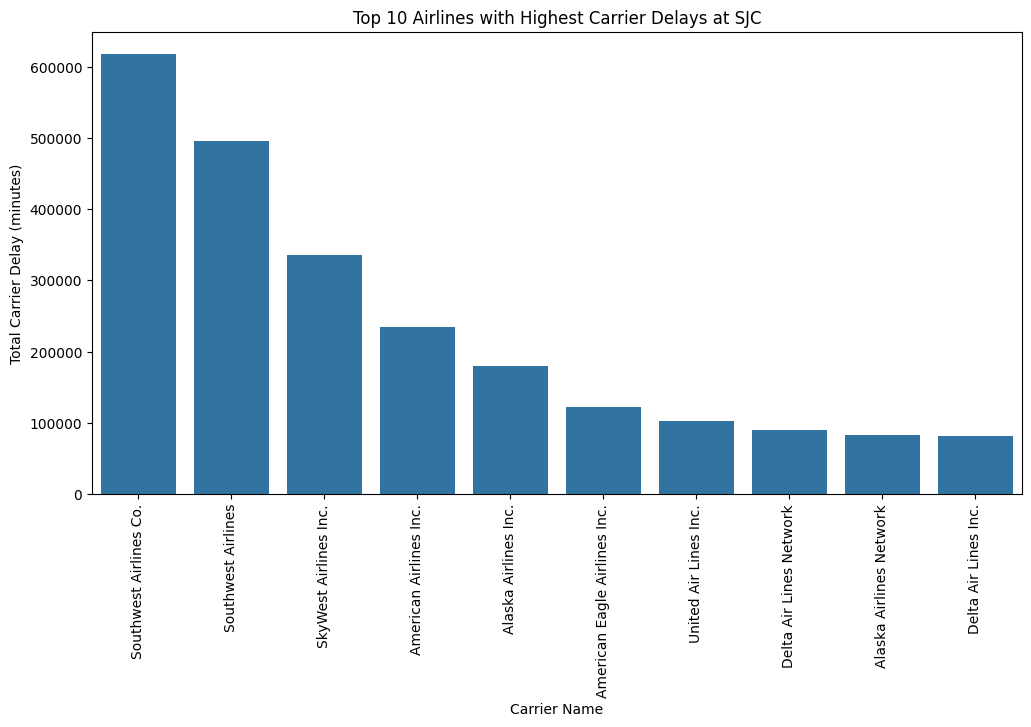

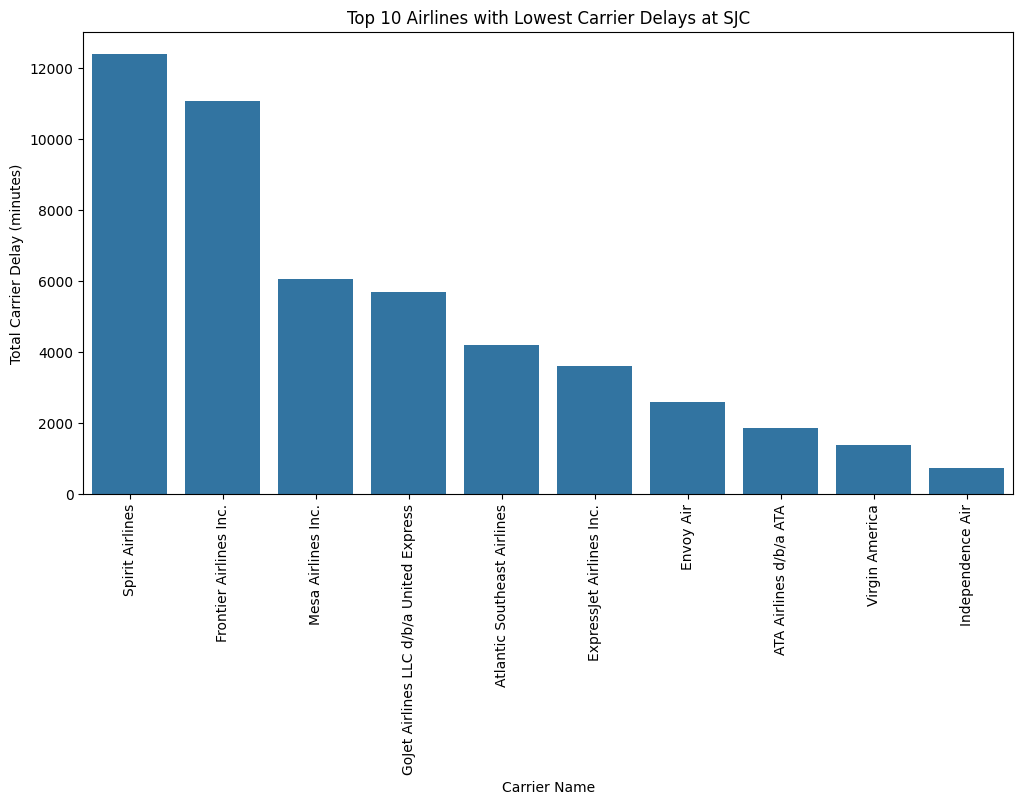

In [ ]:
highest_delays = carrier_delays.head(10)
lowest_delays = carrier_delays.tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=highest_delays.index, y=highest_delays.values)
plt.xticks(rotation=90)
plt.xlabel('Carrier Name')
plt.ylabel('Total Carrier Delay (minutes)')
plt.title('Top 10 Airlines with Highest Carrier Delays at SJC')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_delays.index, y=lowest_delays.values)
plt.xticks(rotation=90)
plt.xlabel('Carrier Name')
plt.ylabel('Total Carrier Delay (minutes)')
plt.title('Top 10 Airlines with Lowest Carrier Delays at SJC')
plt.show()

In [ ]:
import plotly.express as px

fig_high = px.bar(highest_delays, x=highest_delays.index, y=highest_delays.values,
                  labels={'x': 'Carrier Name', 'y': 'Total Carrier Delay (minutes)'},
                  title='Top 10 Airlines with Highest Carrier Delays at SJC')
fig_high.show()

fig_low = px.bar(lowest_delays, x=lowest_delays.index, y=lowest_delays.values,
                 labels={'x': 'Carrier Name', 'y': 'Total Carrier Delay (minutes)'},
                 title='Top 10 Airlines with Lowest Carrier Delays at SJC')
fig_low.show()

In [ ]:
import plotly.express as px

fig = px.treemap(carrier_delays, path=[carrier_delays.index], values=carrier_delays.values,
                 title='Proportion of Carrier Delays at SJC by Airline')
fig.show()

In [ ]:
import plotly.express as px

fig = px.pie(carrier_delays, values=carrier_delays.values, names=carrier_delays.index,
             title='Proportion of Carrier Delays at SJC by Airline')
fig.show()

In [ ]:
unique_carriers = sjc_df_filtered['carrier_name'].unique()
print("List of all airline carriers at SJC:")
for carrier in unique_carriers:
    print(carrier)

List of all airline carriers at SJC:
Hawaiian Airlines Network
Spirit Airlines
SkyWest Airlines Inc.
Horizon Air
American Airlines Network
Alaska Airlines Network
Delta Air Lines Network
Frontier Airlines
United Air Lines Network
Southwest Airlines
Envoy Air
JetBlue Airways
Mesa Airlines Inc.
Compass Airlines
GoJet Airlines LLC d/b/a United Express
American Airlines Inc.
Alaska Airlines Inc.
United Air Lines Inc.
Southwest Airlines Co.
Delta Air Lines Inc.
Frontier Airlines Inc.
Hawaiian Airlines Inc.
US Airways Inc.
Virgin America
American Eagle Airlines Inc.
Continental Air Lines Inc.
Northwest Airlines Inc.
ExpressJet Airlines Inc.
Atlantic Southeast Airlines
America West Airlines Inc.
Independence Air
ATA Airlines d/b/a ATA


In [12]:
sjc_df_last_5_years = sjc_df_filtered[sjc_df_filtered['year'] >= 2020]
unique_carriers_last_5_years = sjc_df_last_5_years['carrier_name'].unique()

print("Airlines that flew to SJC in the last 5 years:")
for carrier in unique_carriers_last_5_years:
    print(carrier)

Airlines that flew to SJC in the last 5 years:
Hawaiian Airlines Network
Spirit Airlines
SkyWest Airlines Inc.
Horizon Air
American Airlines Network
Alaska Airlines Network
Delta Air Lines Network
Frontier Airlines
United Air Lines Network
Southwest Airlines
Envoy Air
JetBlue Airways
Mesa Airlines Inc.
Compass Airlines


SyntaxError: unterminated string literal (detected at line 1) (ipython-input-13-3447006851.py, line 1)

let's look only last 5 years data and looking only carrires which are currently active.

compass airlines is not acitive anynomre. so remove it from the data.


In [15]:
sjc_df_last_5_years = sjc_df_last_5_years[sjc_df_last_5_years['carrier_name'] != 'Compass Airlines']
unique_carriers_last_5_years = sjc_df_last_5_years['carrier_name'].unique()

print("Airlines that flew to SJC in the last 5 years (excluding Compass Airlines):")
for carrier in unique_carriers_last_5_years:
    print(carrier)

Airlines that flew to SJC in the last 5 years (excluding Compass Airlines):
Hawaiian Airlines Network
Spirit Airlines
SkyWest Airlines Inc.
Horizon Air
American Airlines Network
Alaska Airlines Network
Delta Air Lines Network
Frontier Airlines
United Air Lines Network
Southwest Airlines
Envoy Air
JetBlue Airways
Mesa Airlines Inc.


In [16]:
import plotly.express as px

carrier_delays_last_5_years = sjc_df_last_5_years.groupby('carrier_name')['carrier_delay'].sum().sort_values(ascending=False)

fig = px.bar(carrier_delays_last_5_years, x=carrier_delays_last_5_years.index, y=carrier_delays_last_5_years.values,
             labels={'x':'Carrier Name', 'y':'Total Carrier Delay (minutes)'},
             title='Total Carrier Delays at SJC in the Last 5 Years')
fig.show()

In [22]:
airline_performance = sjc_df_last_5_years.groupby('carrier_name').agg(
    total_delays=('carrier_delay', 'sum'),
    total_flights=('arr_flights', 'sum'),
    total_delayed_flights=('carrier_ct', 'sum')
)

print(airline_performance.head())

airline_performance['average_delay'] = airline_performance['total_delays'] / airline_performance['total_delayed_flights']
airline_performance['delay_rate'] = (airline_performance['total_delayed_flights'] / airline_performance['total_flights']) * 100

display(airline_performance[['average_delay', 'delay_rate']].sort_values(by='delay_rate', ascending=False))

                           total_delays  total_flights  total_delayed_flights
carrier_name                                                                 
Alaska Airlines Network         50493.0        16351.0                 870.19
American Airlines Network       41855.0         9533.0                 710.23
Delta Air Lines Network         61617.0        11219.0                 786.64
Envoy Air                        1332.0          507.0                  28.32
Frontier Airlines                4024.0         1253.0                  56.07


,average_delay,delay_rate
carrier_name,,
Hawaiian Airlines Network,38.922242,14.837706
JetBlue Airways,73.479898,13.171408
Mesa Airlines Inc.,78.245958,8.648305
American Airlines Network,58.931614,7.450226
Delta Air Lines Network,78.329350,7.011677
United Air Lines Network,61.582148,7.001410
SkyWest Airlines Inc.,53.808627,5.931052
Envoy Air,47.033898,5.585799
Alaska Airlines Network,58.025259,5.321937


In [21]:
import plotly.express as px

airline_performance_sorted_avg = airline_performance.sort_values(by='average_delay', ascending=False)
fig_avg_delay = px.bar(airline_performance_sorted_avg, x=airline_performance_sorted_avg.index, y='average_delay',
                       labels={'x':'Carrier Name', 'y':'Average Delay (minutes)'},
                       title='Average Carrier Delay per Delayed Flight at SJC (Last 5 Years)')
fig_avg_delay.show()

airline_performance_sorted_rate = airline_performance.sort_values(by='delay_rate', ascending=False)
fig_delay_rate = px.bar(airline_performance_sorted_rate, x=airline_performance_sorted_rate.index, y='delay_rate',
                        labels={'x':'Carrier Name', 'y':'Delay Rate (%)'},
                        title='Carrier Delay Rate at SJC (Last 5 Years)')
fig_delay_rate.show()